In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
student_data = pd.read_csv('C:\\Users\\Shreyansh jain\\Desktop\\Student-Intervention-master\\student-data1.csv')
print ("Student data read successfully!")

Student data read successfully!


In [3]:
feature_cols = list(student_data.columns[:-1])  
target_col = student_data.columns[-1]  
print("Feature column(s):{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))
x = student_data[feature_cols]  
y_all = student_data[target_col]
x

Feature column(s):['Id', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,5,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,2,2,services,...,yes,no,no,5,5,4,4,5,4,11
391,392,MS,M,17,U,LE3,T,3,1,services,...,yes,yes,no,2,4,5,3,4,2,3
392,393,MS,M,21,R,GT3,T,1,1,other,...,yes,no,no,5,5,3,3,3,3,3
393,394,MS,M,18,R,LE3,T,3,2,services,...,yes,yes,no,4,4,1,3,4,5,0


In [5]:
def preprocess_features(X):
    df_preprocess = pd.DataFrame(index=X.index)
    for colname, col_data in X.iteritems():
        if col_data.dtype == object: 
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        if col_data.dtype == object: 
            col_data = col_data.replace(['GP', 'MS'], [1, 0])
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=colname)
        df_preprocess = df_preprocess.join(col_data)  # collect column(s) in output dataframe
    return df_preprocess
X_all = preprocess_features(x)


print("Processed Feature Columns")
X_all



Processed Feature Columns


,Id,school,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,1,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,2,1,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,3,1,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,4,1,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,5,1,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,0,0,1,20,0,1,0,1,1,...,1,0,0,5,5,4,4,5,4,11
391,392,0,0,1,17,0,1,0,1,0,...,1,1,0,2,4,5,3,4,2,3
392,393,0,0,1,21,1,0,1,0,0,...,1,0,0,5,5,3,3,3,3,3
393,394,0,0,1,18,1,0,0,1,0,...,1,1,0,4,4,1,3,4,5,0


In [6]:
y = pd.DataFrame(y_all, index = y_all.index)
y = y.replace(['yes', 'no'], [1, 0])
df_data = pd.concat([X_all, y], axis = 1)

df_data.head()

,Id,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,1,1,0,1,0,18,0,1,1,0,...,0,0,4,3,4,1,1,3,6,0
1,2,1,0,1,0,17,0,1,1,0,...,1,0,5,3,3,1,1,3,4,0
2,3,1,0,1,0,15,0,1,0,1,...,1,0,4,3,2,2,3,3,10,1
3,4,1,0,1,0,15,0,1,1,0,...,1,1,3,2,2,1,1,5,2,1
4,5,1,0,1,0,16,0,1,1,0,...,0,0,4,3,2,1,2,5,4,1


In [7]:
X = df_data.pivot(index="Id",columns="absences",values="passed")
X=X.fillna(0)
X1=X
X

absences,0,1,2,3,4,5,6,7,8,9,...,24,25,26,28,30,38,40,54,56,75
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = X.values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

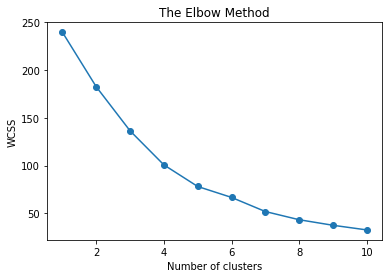

In [9]:
from sklearn.cluster import KMeans
wcss = []
#X = np.reshape(X,(-1, 2))
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker="o")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init =10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

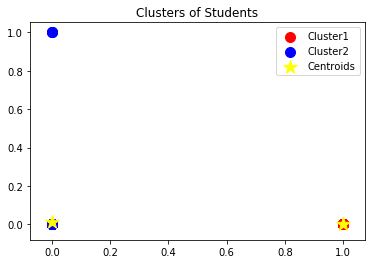

In [16]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s= 100, c= 'red',label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s= 100, c= 'blue',label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], marker="*" ,s= 200, c= 'yellow',label = 'Centroids')
plt.title('Clusters of Students')
plt.legend()
plt.show()

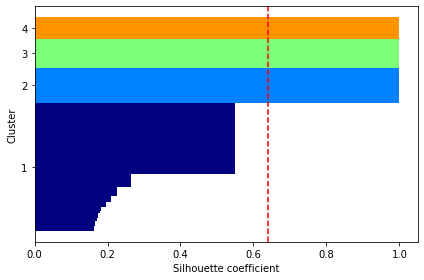

In [11]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

In [12]:
cluster_map = pd.DataFrame()
cluster_map['Student_id'] = X1.index.values
cluster_map['cluster'] = kmeans.labels_


In [13]:
cluster_map

,Student_id,cluster
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
390,391,1
391,392,1
392,393,1
393,394,0
